In [2]:
import glob
subs=glob.glob("./orthomcl/sub_networks/*.csv")
subs

['./orthomcl/sub_networks/3-cos.csv',
 './orthomcl/sub_networks/cos-lambda.csv',
 './orthomcl/sub_networks/headful1.csv',
 './orthomcl/sub_networks/headful2.csv',
 './orthomcl/sub_networks/N4T4.csv']

In [3]:
from skbio.alignment import Alignment
from skbio.sequence import Protein
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
seqlist=[]

with open(subs[2]) as infile:
    for l in infile:
        if l.split(",")[12].replace('"','')!="name":
            seqlist.append(l.split(",")[12].replace('"',''))


['1.271.A.',
 '1.270.B.',
 'epsilon15',
 '1.282.A.',
 '1.281.O.',
 '1.277.A.',
 '1.280.O.',
 '1.270.A.',
 '1.277.B.',
 '1.196.O.',
 '1.232.O.',
 '1.195.O.',
 '1.182.O.',
 '1.171.O.',
 '1.194.O.',
 '1.269.O.',
 '1.268.B.',
 '1.200.O.',
 '1.268.A.',
 '1.283.B.',
 '1.267.O.',
 '1.283.A.',
 '1.283.C.',
 '1.007.O.',
 '1.263.A.',
 '1.263.B.',
 '1.278.O.',
 '1.256.O.',
 '1.106.O.',
 '1.186.O.',
 '1.199.A.',
 '1.286.O.',
 '1.110.O.',
 '1.105.O.',
 'LL-H',
 '1.199.B.',
 '1.236.O.',
 'MM1',
 '1.248.O.',
 '1.173.O.',
 'phig1e',
 '1.149.O.',
 'EJ-1',
 '1.243.O.',
 '1.123.O.',
 '1.273.O.',
 '1.013.O.',
 'O1205',
 'phiFlu',
 'phi-ETA',
 'APSE-1',
 '1.085.O.',
 '1.214.O.',
 'Sfi11',
 'ES18',
 '1.176.O.',
 'MSW-3',
 '1.172.O.',
 '1.003.O.',
 '1.116.O.',
 'NF5',
 '1.134.O.',
 '1.091.O.',
 '1.189.C.',
 '1.039.O.',
 '1.189.O.',
 '1.090.B.',
 'phi-11',
 '1.079.O.',
 '1.189.B.',
 '1.036.O.',
 'SKIN',
 '12G01.O.',
 'SPP1',
 '1.067.O.',
 '1.178.O.',
 '1.061.O.',
 'PBSX',
 'Sf6',
 'phiHSIC',
 '1.275.O.',
 '1.

In [17]:
from Bio import SeqIO

def write_ids_to_fasta(id_list, fast_in, fast_out):
    out_recs=[]
    for record in SeqIO.parse(open_fasta(fast_in), "fasta"):
        if record.id in id_list:
            out_recs.append(record)
            
    out=open(fast_out, "w")
    SeqIO.write(out_recs, out, "fasta")
    out.close()
    
def open_fasta(fasta):
    fast=open(fasta, "rU")
    return fast

In [18]:
write_ids_to_fasta(seqlist, "./data/term_short_nahant_term.fasta","./orthomcl/sub_networks/headful1.fasta")

In [19]:
!muscle -in ./orthomcl/sub_networks/headful1.fasta -out ./orthomcl/sub_networks/headful1_aln.fasta


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA

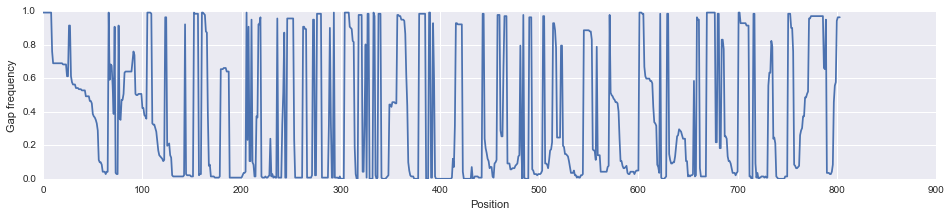

In [20]:
aln = Alignment.read(file = "orthomcl/sub_networks/headful1_aln.fasta", format="fasta")
gap_freq = [d["-"] for d in aln.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

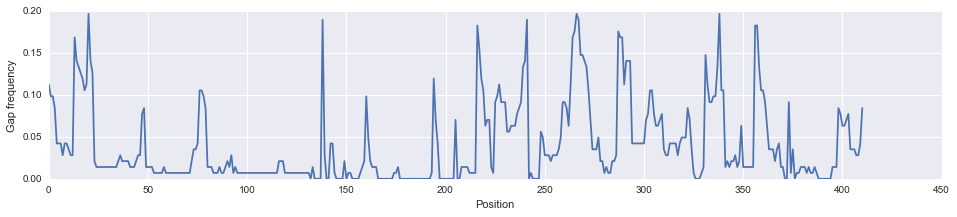

In [23]:
keepers, = np.where(np.array(gap_freq)<=0.2)
aln_masked = aln.subalignment(positions_to_keep=keepers)
gap_freq2 = [d["-"] for d in aln_masked.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [24]:
aln_masked.write("orthomcl/sub_networks/headful1_aln_masked0.2.fasta")
!head -n2 orthomcl/sub_networks/headful1_aln_masked0.2.fasta

>phiES15
LNHLYWITDKFKMFEGMHTR--NIILKARQLGFTTLVCIIQLDAALFEGAKCALIAHTLNDAKRLFREKIKYAYDR--PAEIASNDAAGELFKKGGSLYVSRGSEFGKICAKAREIVTGAFEAVSTTTIESTAEGRAGCQTALSAPLSQLSWFFSWWMNPLSQRLRDYFDETLNDR-QKAWYQAKETTLGDDMKREYPSIPAEAFQQSVEGAYYAKFAFLYAQRRIGQPDNDHLPVYTFWDIGGDSTAIWF--------VRVVGNE--------FHIIDYYENSGEG----LRHYMKILKEKGTYAEHWAPHD---------IDNREFANDSRRQLARESISFSVVPLGVAEGIELEIDSVKCEEGISHYRKEWDAKRGCWKDNPLTSHASDGFRYFASRTMPV-------


In [25]:
!FastTree <orthomcl/sub_networks/headful1_aln_masked0.2.fasta> orthomcl/sub_networks/headful1_aln_masked0.2.tree

FastTree Version 2.1.8 No SSE3
Alignment: standard input
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Initial topology in 0.06 seconds
Refining topology: 27 rounds ME-NNIs, 2 rounds ME-SPRs, 13 rounds ML-NNIs
Total branch-length 29.506 after 0.67 sec
ML-NNI round 1: LogLk = -44098.050 NNIs 9 max delta 5.07 Time 1.82
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.068 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -42871.052 NNIs 7 max delta 3.60 Time 2.84
ML-NNI round 3: LogLk = -42869.340 NNIs 0 max delta 0.00 Time 3.07
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 4: LogLk = -42

In [22]:
from ete3 import TreeNode
t=TreeNode("orthomcl/sub_networks/headful1_aln_masked0.2.tree")

phage_info=open("/Users/jmb/Desktop/ViralFate/genome_data/data/all_info.txt").readlines()
print phage_info[0]
nphages=[i.split("\t")[0] for i in phage_info[1:]]

d_bgroup=dict(zip([i.split("\t")[0] for i in phage_info[1:]],[i.split("\t")[8] for i in phage_info[1:]]))

terminase_info=open("orthomcl/terminase_ortho_groups.txt").readlines()
print terminase_info[:10]

d_ogroup=dict(zip([i.split("\t")[0] for i in terminase_info], [i.split("\t")[1] for i in terminase_info]))



np=[]

for node in t:
    np.append(node.name)
    
    if node.name in nphages:
        node.add_feature("dbs",d_bgroup[node.name])
    else:
        node.add_feature("dbs","none")
        
    node.add_feature("ortho_group",d_ogroup[node.name])

phage	num_hosts	min_host_similarity	kk_grp	family	order	nucleotide_level_divs	illumina_genome_len	bray_clusters_eps0.9	euclidean_clusters_eps15	eval	term_blast_ld	term_blast_sd	term_clust	term_ortho_sd	term_ortho_ld	cov_category

['RadMu\tterminase48\tMu\thost ends/Mu\n', 'B3\tterminase48\tMu\thost ends/Mu\n', 'psiM100\tterminase43\tNoRep\tNoRep\n', 'psiM2\tterminase43\tNoRep\tNoRep\n', '1.262.O.\tterminase32\tHeadful\theadful/P22\n', 'PhiEco32\tterminase32\tHeadful\theadful/P22\n', 'ST64T\tterminase32\tHeadful\theadful/P22\n', 'P22\tterminase32\tHeadful\theadful/P22\n', 'LP7\tterminase32\tHeadful\theadful/P22\n', 'D3112\tterminase50\tHeadful\theadful/D3112\n']


In [23]:
groups=[d_bgroup[i] for i in np if i in d_bgroup.keys()]
groups=list(set(groups))

hue36=["#D2ADD5",
"#68E154",
"#DD4C2A",
"#2F3A2E",
"#CB51D7",
"#73D9D1",
"#DDCE45",
"#893255",
"#E1B48A",
"#706AD3",
"#A96F29",
"#66DC9A",
"#392D54",
"#D23D91",
"#DA425D",
"#598F76",
"#859239",
"#8C2D24",
"#CACFC5",
"#9C7B84",
"#BFD89C",
"#CC7DCC",
"#65421F",
"#7AB3D0",
"#4BA03B",
"#793F85",
"#6784C7",
"#CF755E",
"#AEE035",
"#4A6379",
"#3D5E26",
"#D67791",
"#4F262C",
"#BADB6F",
"#907F58",
"#DF9E37"]

group_cols=dict(zip(groups, hue36)) 
print group_cols

{'11': '#D2ADD5', '13': '#68E154', '27': '#DD4C2A', '21': '#2F3A2E', '17': '#CB51D7', '19': '#73D9D1', '31': '#DDCE45', '26': '#893255', '29': '#E1B48A', '1': '#706AD3', '0': '#A96F29', '4': '#66DC9A', '7': '#392D54', '6': '#D23D91', '9': '#DA425D', '34': '#598F76', '33': '#859239'}


In [24]:
#Add circles to leaf faces colored based on dbscan group 
from ete3 import Tree, NodeStyle, TreeStyle, faces, TreeNode, RectFace, CircleFace


ts = TreeStyle()
ts.show_leaf_name = False
#ts.mode = "c"   #circular tree
ts.show_leaf_name = True
ts.optimal_scale_level="full" 


for node in t:
    if node.name in d_bgroup.keys():
        col=group_cols[d_bgroup[node.name]]
        #node.add_face(RectFace(width=16,height=14,fgcolor=color, bgcolor=color),
         #         column=3, position="branch-right")
        #nstyle=NodeStyle()
        #nstyle["bgcolor"]=color
        #node.set_style(nstyle)
        node.add_face(CircleFace(radius=6,color=col),
          column=3, position="branch-right")
#t.show(tree_style=ts)

In [25]:
t.render("orthomcl/sub_networks/headful1_2_ete3.pdf", tree_style=ts)

{'faces': [[34.0, 1036.0, 72.0, 1046.0, 154, '1.042.O.'],
  [72.0, 1035.0, 84.0, 1047.0, 154, None],
  [43.0, 1450.0, 81.0, 1460.0, 222, '1.177.O.'],
  [81.0, 1449.0, 93.0, 1461.0, 222, None],
  [28.0, 1554.0, 66.0, 1564.0, 240, '1.079.O.'],
  [66.0, 1553.0, 78.0, 1565.0, 240, None],
  [34.0, 354.0, 72.0, 364.0, 57, '1.033.O.'],
  [72.0, 353.0, 84.0, 365.0, 57, None],
  [34.0, 899.0, 53.0, 909.0, 131, 'NF5'],
  [31.0, 1204.0, 69.0, 1214.0, 182, '1.278.O.'],
  [69.0, 1203.0, 81.0, 1215.0, 182, None],
  [34.0, 1602.0, 77.0, 1612.0, 247, '12G01.O.'],
  [77.0, 1601.0, 89.0, 1613.0, 247, None],
  [37.0, 330.0, 75.0, 340.0, 55, '1.088.O.'],
  [75.0, 329.0, 87.0, 341.0, 55, None],
  [34.0, 762.0, 72.0, 772.0, 107, '1.176.O.'],
  [72.0, 761.0, 84.0, 773.0, 107, None],
  [34.0, 968.0, 72.0, 978.0, 143, '1.231.O.'],
  [72.0, 967.0, 84.0, 979.0, 143, None],
  [19.0, 1132.0, 57.0, 1142.0, 169, '1.149.O.'],
  [57.0, 1131.0, 69.0, 1143.0, 169, None],
  [31.0, 819.0, 54.0, 829.0, 116, 'SKIN'],
  [34.